In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils.matplotlib_init

In [33]:
x = np.array([[8, 5], [10, 7], [7, 10], [7, 9], [8, 8], [15, 6], [12, 4], [15, 2], [16, 3], [13, 3]])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1])

In [109]:
a = np.linalg.lstsq(x, y)[0]

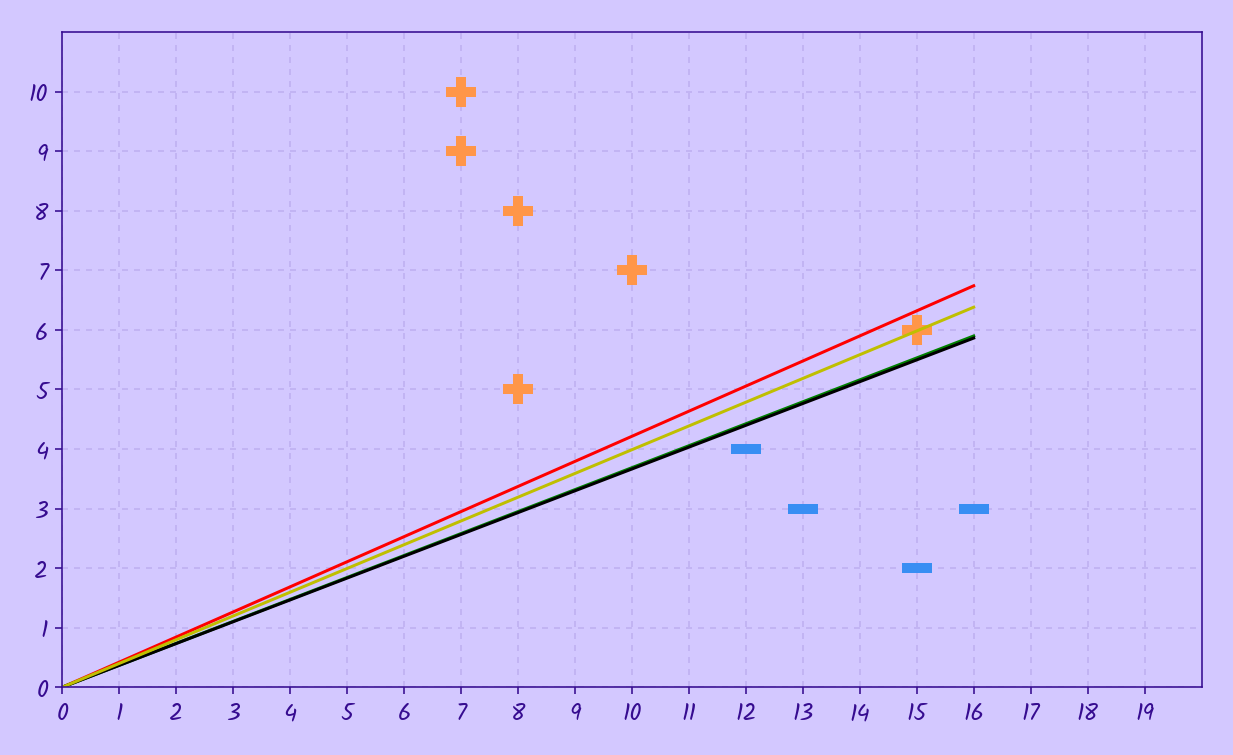

In [124]:
ax = plt.gca()

plt.xlim(0, 20)
plt.ylim(0, 11)

ax.set_xticks(np.arange(0, 20))
ax.set_yticks(np.arange(0, 11))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.tick_params(axis='both', which='major', labelsize=12)

plt.grid(dashes=[3, 3])

plt.plot(x[y == -1, 0], x[y == -1, 1], '_', c='C0', label='$y_i$ = -1', ms=15, mew=5)
plt.plot(x[y == 1, 0], x[y == 1, 1], '+', c='C1', label='$y_i$ = -1', ms=15, mew=5)

line = - a[0] * np.array([0, 16]) / a[1]
plt.plot([0, 16], line, 'r', linewidth=1.5)

line = - model.coef_[0][0] * np.array([0, 16]) / model.coef_[0][1]
plt.plot([0, 16], line, 'g', linewidth=1.5)

line = - w[0] * np.array([0, 16]) / w[1]
plt.plot([0, 16], line, 'k', linewidth=1.5)

line = - wp[0] * np.array([0, 16]) / wp[1]
plt.plot([0, 16], line, 'y', linewidth=1.5)



# ax.legend(fontsize=16)
# plt.text(-7.2, 3.9, f'{a[0]:.3f}$x_1$ + {a[1]:.3f}$x_2$ = 0', rotation=-28, fontsize=16)

ax.figure.tight_layout(pad=1.5)

In [25]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression(C=100, fit_intercept=False)
model.fit(x, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
model.coef_

array([[-2.10372128,  5.70640014]])

In [30]:
a

array([-0.08902374,  0.21127568])

In [43]:
yz = y > 0
w = np.zeros(2)
lr = 0.1
for i in range(100):
    z = np.dot(x, w)
    h = 1 / (1 + np.exp(-z))
    gradient = x.T @ (h - yz) / len(y)
    w -= lr * gradient
w

array([-0.56106128,  1.53105045])

In [123]:
yz = y
wp = np.zeros(2)#np.random.randn(2)
lr = 0.01
for i in range(100):
    z = np.dot(x, wp)
    predicted = np.sign(z)
    wp += lr * x.T @ (yz - predicted)
wp

array([-0.69,  1.73])

In [ ]:
(n,m)x(1,m)